In [160]:
#fossil_fuel_burning_rate
import pandas as pd

# 读取数据并按照空格分隔
file_path = 'global.1751_2014.ems'
data = pd.read_csv(file_path, skiprows=33, delim_whitespace=True)#从第33行开始是有效数据（第33行是列名称）


# 提取1987到2004年的数据
ffb = data[(data['Year'] >= 1986) & (data['Year'] <= 2004)]

# 查看数据的前几行
print(ffb)

     Year  Total   Gas  Liquids  Solids  Production  Flaring  Capita
235  1986   5583   830     2293    2277         137       46    1.13
236  1987   5725   892     2306    2339         143       44    1.14
237  1988   5936   935     2412    2387         152       50    1.16
238  1989   6066   982     2459    2428         156       41    1.16
239  1990   6074  1026     2492    2359         157       40    1.14
240  1991   6142  1051     2601    2284         161       45    1.14
241  1992   6078  1085     2499    2290         167       36    1.11
242  1993   6070  1117     2515    2225         176       37    1.09
243  1994   6174  1133     2539    2278         186       39    1.09
244  1995   6305  1151     2560    2359         197       39    1.10
245  1996   6448  1198     2626    2382         203       40    1.11
246  1997   6556  1197     2701    2409         209       40    1.11
247  1998   6576  1224     2763    2343         209       36    1.10
248  1999   6561  1258     2741   

C:\Users\zhangchen\AppData\Local\Temp\ipykernel_19000\1239718085.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, skiprows=33, delim_whitespace=True)#从第33行开始是有效数据（第33行是列名称）


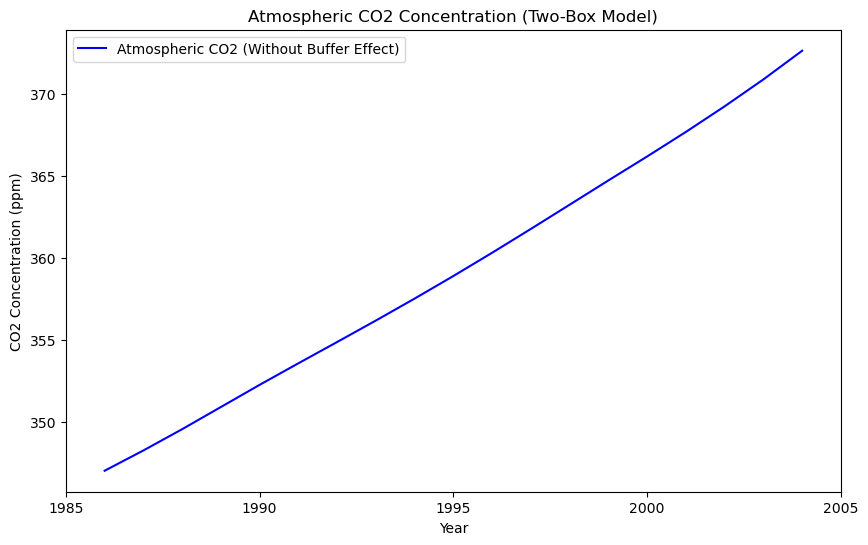

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
k12 = 105 / 740
k21 = 102 / 900
k = 740 / 347 # CONVERSE ppm to Pgc

# 线性插值函数：根据年份返回对应的燃烧速率
def fossil_fuel_burning_rate(t):
    # 使用pandas的插值功能
    return np.interp(t, ffb['Year'], ffb['Total']/1000/k)

# System of differential equations
def carbon_cycle(t, y):
    N1, N2 = y
    gamma = fossil_fuel_burning_rate(t)
    dN1_dt = -k12 * N1 + k21 * N2 + gamma
    dN2_dt = k12 * N1 - k21 * N2
    return [dN1_dt, dN2_dt]

# Initial conditions (for 1986, adjust values based on data or assumptions)
N1_0 = 740/k  # Initial CO2 concentration in the atmosphere, 1986 in ppm
N2_0 = 900/k  # Initial CO2 concentration in the deep ocean, arbitrary for illustration

# 时间跨度从1986到2004
t_span = (1986, 2004)
t_eval = np.linspace(1986, 2004, 19)  # 时间点

# Solve the system of ODEs
solution = solve_ivp(carbon_cycle, t_span, [N1_0, N2_0], t_eval=t_eval)
Without = []
Without = solution.y[0]
# Plot the results (only atmospheric CO2)
plt.figure(figsize=(10, 6))
plt.plot(solution.t, Without, label='Atmospheric CO2 (Without Buffer Effect)', color='blue')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration (Two-Box Model)')
plt.xticks(np.arange(1985, 2006, 5))  # 设置x轴显示每5年一个点
plt.legend()
plt.show()


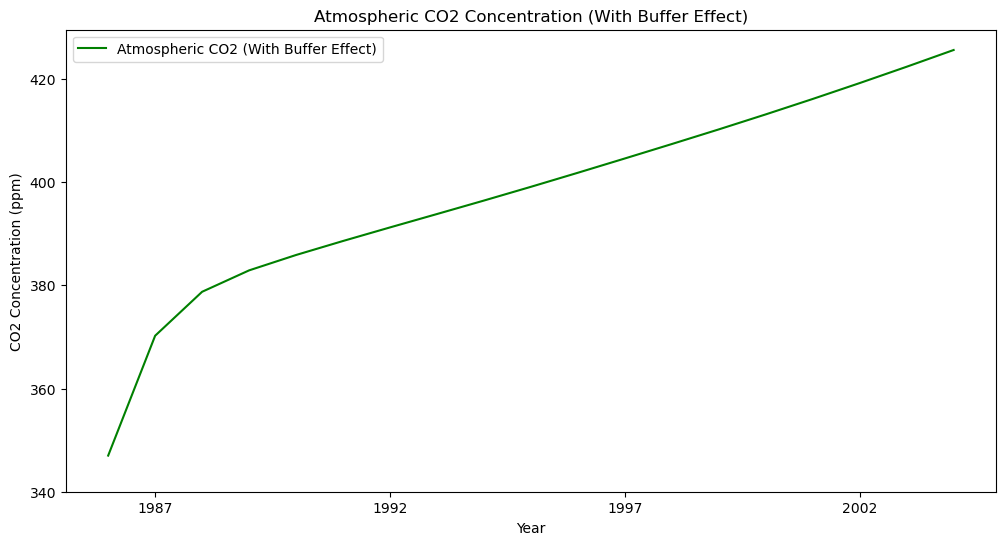

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# 初始条件（1986年）


# 参数设置
k = 740 / 347 # CONVERSE ppm to Pgc
k12 = 105 / 740
k21 = 102 / 900
N2_prime = 821/k  #900-81=821 PgC N2' 是常量

# 线性插值函数：根据年份返回对应的燃烧速率
def fossil_fuel_burning_rate(t):
    # 使用pandas的插值功能
    return np.interp(t, ffb['Year'], ffb['Total']/1000/k)


# 函数a(N1)
def a(N1):
    return 3.69 + 0.0186 * N1 - 0.0000018 * N1**2

# 系统的微分方程（有缓冲效应）
def carbon_cycle_with_buffer(t, y):
    N1, N2 = y
    gamma  = fossil_fuel_burning_rate(t)
    a_val = a(N1)
    dN1_dt = -k12 * N1 + k21 * (N2_prime + a_val * (N2 - N2_prime)) + gamma
    dN2_dt = k12 * N1 - k21 * (N2_prime + a_val * (N2 - N2_prime))
    return [dN1_dt, dN2_dt]

# 初始条件（1986年）
N1_0 = 740/k  # 740PgC
N2_0 = 900/k # 900PgC = 422 ppm 

# 时间跨度从1986到2004
t_span = (1986, 2004)
t_eval = np.linspace(1986, 2004, 19)  # 时间点

# 使用solve_ivp进行数值积分
solution = solve_ivp(carbon_cycle_with_buffer, t_span, [N1_0, N2_0], t_eval=t_eval, method='LSODA')  # 使用RK4方法
With = []
With = solution.y[0]

year = []
year = solution.t
# 绘制结果（仅大气CO2浓度）
plt.figure(figsize=(12, 6))
plt.plot(year, With, label='Atmospheric CO2 (With Buffer Effect)', color='green') 
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration (With Buffer Effect)')
plt.yticks(np.arange(340, 430, 20))  # 设置x轴显示每5年一个点
plt.xticks(np.arange(1987, 2006, 5))  # 设置x轴显示每5年一个点
plt.legend()
plt.grid(False)
plt.show()


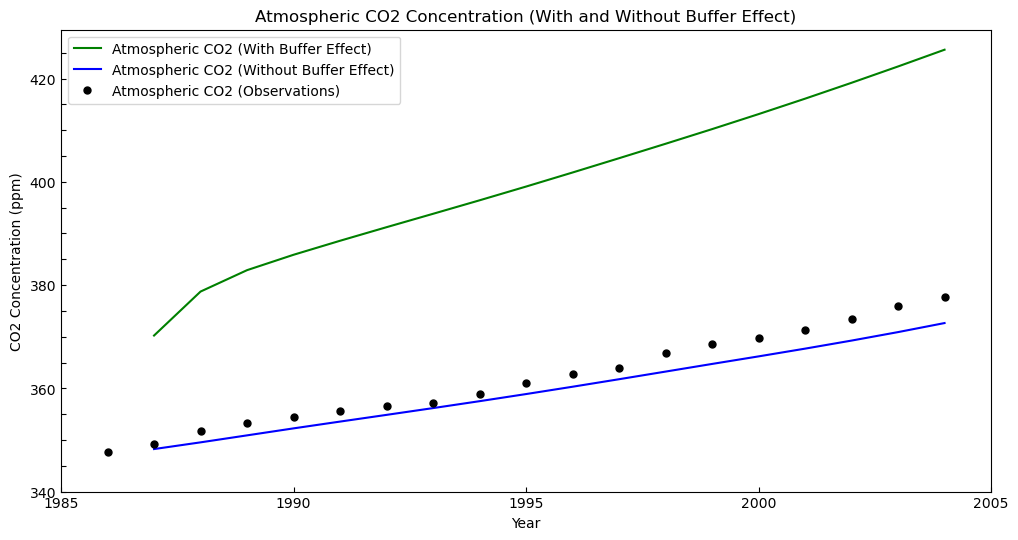

In [163]:
import pandas as pd

# Read the CSV file, skipping the first 43 lines of invalid data
df = pd.read_csv('co2_annmean_mlo.csv', skiprows=43)

# Extraction of data from 1987 to 2003
df_observations = df[(df['year'] >= 1986) & (df['year'] <= 2004)]

plt.figure(figsize=(12, 6))

# Plotting data with and without buffer effects
plt.plot(year[1:], With[1:], label='Atmospheric CO2 (With Buffer Effect)', color='green')
plt.plot(year[1:], Without[1:], label='Atmospheric CO2 (Without Buffer Effect)', color='blue')
plt.plot(df_observations['year'], df_observations['mean'], label='Atmospheric CO2 (Observations)', color='black', marker='o', linestyle='', markersize=5)



# Set x- and y-axis labels and titles
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration (With and Without Buffer Effect)')

# Set the y-axis scale: one scale for every 5 ppm and display values for every 20 ppm
plt.yticks(np.arange(340, 430, 5))  # Scale every 5 ppm
plt.gca().set_yticklabels([f'{i}' if i % 20 == 0 else '' for i in np.arange(340, 430, 5)])  # Labels displayed every 20 ppm

# Set x-axis scale: from 1985 to 2005 in 5-year steps, showing only multiples of 5 (1985, 1990, 1995, 2000)
plt.xticks(np.arange(1985, 2006, 5)) 

# Setting scale facing inward
plt.tick_params(axis='both', direction='in')

plt.legend()

plt.grid(False)

plt.show()


In [164]:
#fossil_fuel_burning_rate
import pandas as pd

# Reading data and separating it by spaces
file_path = 'global.1751_2014.ems'
data = pd.read_csv(file_path, skiprows = 33 , delim_whitespace=True)# Valid data from row 33 onwards 
# Extraction of data from 1751 to 2004
ffb_1751 = data[(data['Year'] >= 1751) & (data['Year'] <= 2004)]

# check data
#print(ffb_1751)

file_path_land = 'Global_land-use_flux-1850_2005.csv'
data_land = pd.read_csv(file_path_land )# Valid data from row 3 onwards 

data1 = pd.read_csv('lawdome.combined.dat', skiprows = 270, delim_whitespace=True)# Valid data from row 270 onwards 
data1 = data1.drop(columns=data1.columns[2])  # 删除第三列
data1.rename(columns={data1.columns[1]: 'ppm'}, inplace=True)  # 将第二列命名为'ppm'
# Extraction of data from 1750 to 2004
data_observations_ice_core = data1[(data1['year'] >= 1750)&(data1['year'] <= 1850)]
data2 = pd.read_csv('Record derived from a spline smoothing (20 year cutoff) of the DE08 and DE08-2 data (as in figure 5 of Etheridge et al. 1996).csv', skiprows = 3)# Valid data from row 3 onwards 
data_obs_new = data2[(data2['year A.D.'] >= 1850)]

#check data
#print(data_land)
#print(data_observations)

C:\Users\zhangchen\AppData\Local\Temp\ipykernel_19000\3741003931.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, skiprows = 33 , delim_whitespace=True)# Valid data from row 33 onwards
C:\Users\zhangchen\AppData\Local\Temp\ipykernel_19000\3741003931.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data1 = pd.read_csv('lawdome.combined.dat', skiprows = 270, delim_whitespace=True)# Valid data from row 270 onwards


In [183]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
k = 740 / 347 # CONVERSE ppm to Pgc
k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1238

# Constants (assumed values)
N2_prime = 842 / k  # 842


# Parameters for f (function)
f0 = 62/k        
beta1 = 0.38
beta2 = 0.50
P0 = 288.38    

def land_use_change(t):
    # 对于 1750 < t < 1850，执行线性插值
    if 1750 <= t <=1850:
        # 计算插值系数，线性插值从0.2到0.5
        delta = 0.2 + (t - 1750) * (0.5 - 0.2) / (1850 - 1750)/ k
        return delta
    elif t >= 1850:
        # 对于 t > 1850，直接使用 data_land 数据
        delta = data_land.loc[data_land['Year'] == int(t), 'Global'].values[0] / 1000 / k
        return delta

# Linear interpolation function for fossil fuel burning rate
def fossil_fuel_burning_rate(t):
    return np.interp(t, ffb_1751['Year'], ffb_1751['Total'] / 1000 / k)
    
def a(N1):
    # This is consistent with putting into the expression dN1_dt to integrate the answer
    return 3.69 + 0.0186 * N1 - 0.0000018 * N1**2


# Function for calculating f using equation (5)
def calculate_f(N1):
    P = N1  
    return f0 * (1 + beta1 * np.log(P / P0))

# Differential equations
def system(t, y):
    N1, N2, N3, N4, N5, N6, N7 = y

    delta = land_use_change(t)

    gamma  = fossil_fuel_burning_rate(t)
    
    a_val = a(N1)  # Calculate 'a' as a function of N1, which is consistent with putting into the expression dN1_dt to integrate the answer

    f = calculate_f(N1)
    
    # Equation (6) dN1/dt
    dN1_dt = -k12 * N1 + k21 * (N2_prime + a_val * (N2 - N2_prime)) + gamma - f + delta + k51 * N5 + k71 * N7
    
    # Equation (7) dN2/dt
    dN2_dt = k12 * N1 - k21 * (N2_prime + a_val * (N2 - N2_prime)) - k23 * N2 + k32 * N3 - k24 * N2
    
    # Equation (8) dN3/dt
    dN3_dt = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
    
    # Equation (9) dN4/dt
    dN4_dt = k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4
    
    # Equation (10) dN5/dt
    dN5_dt = k45 * N4 - k51 * N5
    
    # Equation (11) dN6/dt
    dN6_dt = f - k67 * N6 - 2 * delta
    
    # Equation (12) dN7/dt
    dN7_dt = k67 * N6 - k71 * N7 + delta

    
    return [dN1_dt, dN2_dt, dN3_dt, dN4_dt, dN5_dt, dN6_dt, dN7_dt]

# Initial conditions

N1_0 = 615 / k  # Initial CO2 concentration 615 PgC   
N2_0 = 842 / k  # Initial concentration for 842 PgC 
N3_0 = 9744 / k   # Initial concentration for N3
N4_0 = 26280 / k   # Initial concentration for N4
N5_0 = 90000000 / k   # Initial concentration for N5
N6_0 = 731 / k   # Initial concentration for N6
N7_0 = 1238 / k    # Initial concentration for N7

# Initial state vector
y0 = [N1_0, N2_0, N3_0, N4_0, N5_0, N6_0, N7_0]

# Time span (from 1750 to 2001)
t_span = (1750, 2001)
t_eval = np.linspace(1750, 1999, 250) # Time points to evaluate



# Solve the system of ODEs
solution = solve_ivp(system, t_span, y0, t_eval=t_eval, method='Radau')

# Extract the result for N1 (atmospheric CO2)
N1_result_1 = solution.y[0] #beta = 0.38



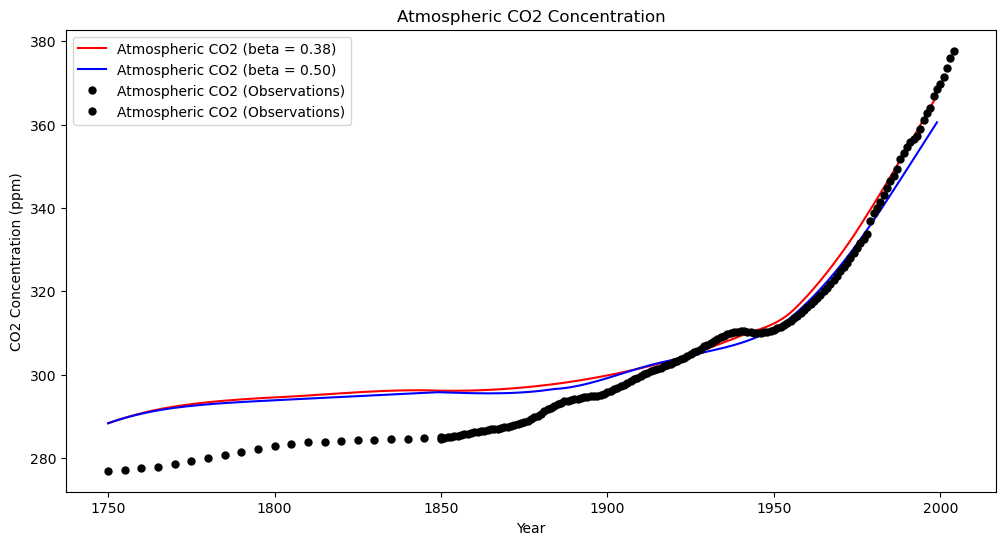

In [185]:
# Function for calculating f using equation (5)
def calculate_f(N1):
    P = N1  
    return f0 * (1 + beta2 * np.log(P / P0))

# Differential equations
def system(t, y):
    N1, N2, N3, N4, N5, N6, N7 = y

    delta = land_use_change(t)

    gamma  = fossil_fuel_burning_rate(t)
    
    a_val = a(N1)  # Calculate 'a' as a function of N1, which is consistent with putting into the expression dN1_dt to integrate the answer

    f = calculate_f(N1)
    
    # Equation (6) dN1/dt
    dN1_dt = -k12 * N1 + k21 * (N2_prime + a_val * (N2 - N2_prime)) + gamma - f + delta + k51 * N5 + k71 * N7
    
    # Equation (7) dN2/dt
    dN2_dt = k12 * N1 - k21 * (N2_prime + a_val * (N2 - N2_prime)) - k23 * N2 + k32 * N3 - k24 * N2
    
    # Equation (8) dN3/dt
    dN3_dt = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
    
    # Equation (9) dN4/dt
    dN4_dt = k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4
    
    # Equation (10) dN5/dt
    dN5_dt = k45 * N4 - k51 * N5
    
    # Equation (11) dN6/dt
    dN6_dt = f - k67 * N6 - 2 * delta
    
    # Equation (12) dN7/dt
    dN7_dt = k67 * N6 - k71 * N7 + delta

    
    return [dN1_dt, dN2_dt, dN3_dt, dN4_dt, dN5_dt, dN6_dt, dN7_dt]

# Solve the system of ODEs
Solution = solve_ivp(system, t_span, y0, t_eval=t_eval, method='Radau')

N1_result_2 = Solution.y[0] #beta = 0.5

# Plot the result for atmospheric CO2 concentration (N1)
plt.figure(figsize=(12, 6))
plt.plot(solution.t, N1_result_1, label="Atmospheric CO2 (beta = 0.38)", color='red')
plt.plot(solution.t, N1_result_2, label="Atmospheric CO2 (beta = 0.50)", color='blue')
plt.plot(data_observations_ice_core['year'], data_observations_ice_core['ppm'], label='Atmospheric CO2 (Observations)', color='black', marker='o', linestyle='', markersize=5)
plt.plot(data_obs_new['year A.D.'], data_obs_new['ppm'], label='Atmospheric CO2 (Observations)', color='black', marker='o', linestyle='', markersize=5)
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration')
plt.grid(False)
plt.legend()
plt.show()

In [167]:
#check With
print(With)

[347.         370.22895108 378.74825552 382.89423417 385.87501948
 388.58894644 391.2189371  393.81280661 396.42435945 399.08797714
 401.81194421 404.58014186 407.37730392 410.21413175 413.12414524
 416.11367557 419.19291354 422.35513308 425.60033419]


In [168]:
#check Without
print(Without)

[347.         348.23766253 349.53690651 350.89037798 352.24556042
 353.55990409 354.8604961  356.17225152 357.51257756 358.8913736
 360.31103119 361.76643405 363.24495806 364.72647126 366.18984144
 367.68946116 369.25204226 370.89515944 372.64722463]
